In [1]:
# this program is used to show the Antarctica realizations
# compiled by Chen Zuo in Aug. 26, 2019

In [2]:
# set the number of realizations
outputAmount = 3

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

the maximum elevation is 3346.0


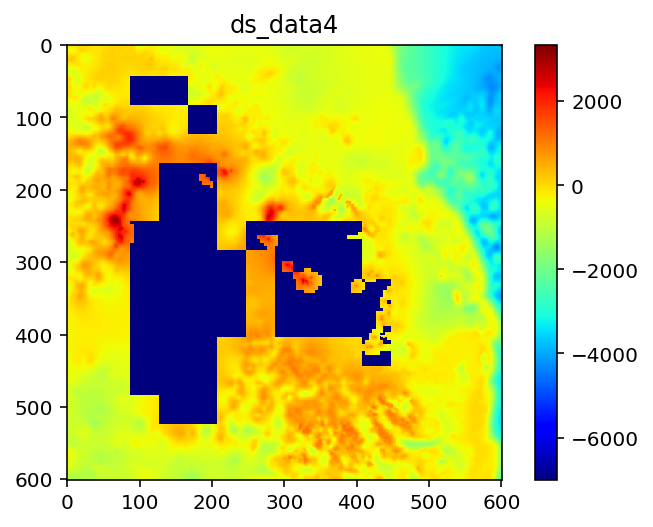

In [5]:
Realization_Height = 601
Realization_Width = 601
knownUpbound = 3346
knownBelowbound = -7000

Realization = np.loadtxt('AntarcticaRealization\Antarctica_ds_data4.txt',skiprows=3)
Realization = Realization.reshape(Realization_Height,Realization_Width)
print('the maximum elevation is '+str(np.max(Realization)))
plt.imshow(Realization,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
plt.title('ds_data4')
plt.colorbar()
plt.show()

new height is 1202
new width is 1202
the size of Realization_2D matrix is (1202, 1202)
the size of realization_row is (1444804,)


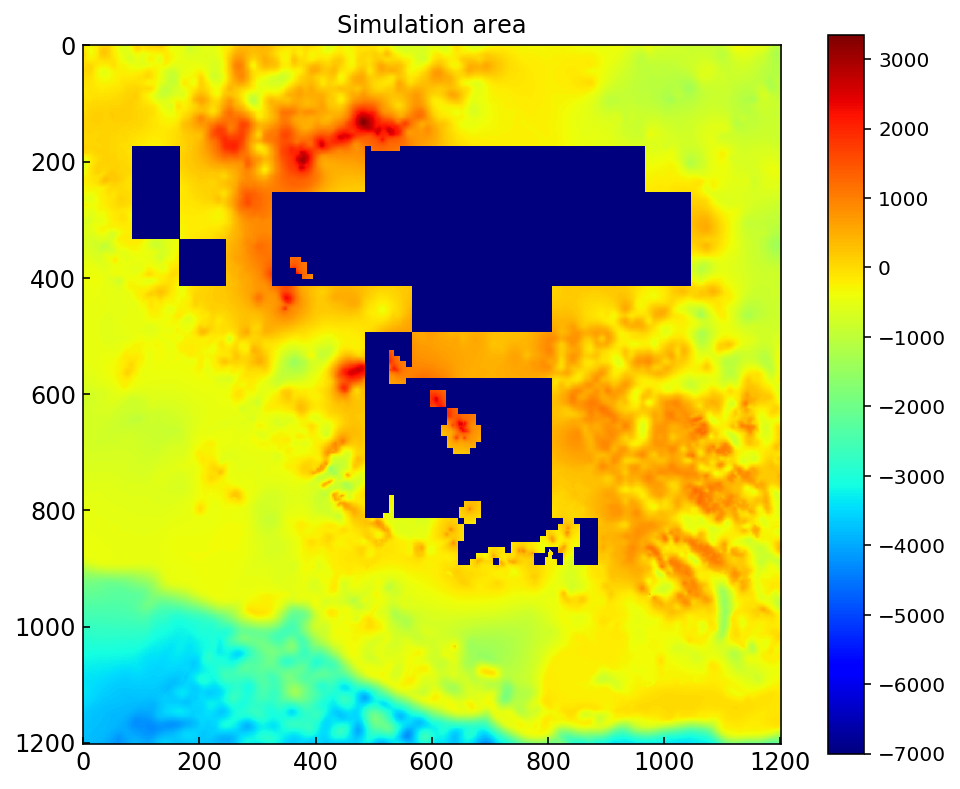

In [6]:
# 2D interpolation
ZoomCoefficient = 2

Realization_Height = int(Realization_Height*ZoomCoefficient)
Realization_Width = int(Realization_Width*ZoomCoefficient)
print('new height is '+str(Realization_Height))
print('new width is '+str(Realization_Width))

coordinate_y = np.linspace(0,Realization_Height-ZoomCoefficient,int(Realization_Height/ZoomCoefficient))
coordinate_x = np.linspace(0,Realization_Width-ZoomCoefficient,int(Realization_Width/ZoomCoefficient))
# print(coordinate_y)

coordinate_y_new = np.linspace(0,Realization_Height-1,Realization_Height)
coordinate_x_new = np.linspace(0,Realization_Width-1,Realization_Width)

interpolationFunction = interpolate.interp2d(coordinate_x, coordinate_y, Realization, kind='linear')
Realization_2D = interpolationFunction(coordinate_x_new, coordinate_y_new)
Realization_row = Realization_2D.reshape(Realization_Height*Realization_Width)
print('the size of Realization_2D matrix is '+str(Realization_2D.shape))
print('the size of realization_row is '+str(Realization_row.shape))

# transpose the 2d matrix
Realization_2D = np.transpose(Realization_2D)

plt.figure(figsize=(7,7))
plt.imshow(Realization_2D,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
#plt.title('ds_data4 after interpolation')
plt.title('Simulation area')
plt.tick_params(direction='in',labelsize='large')
plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
plt.show()

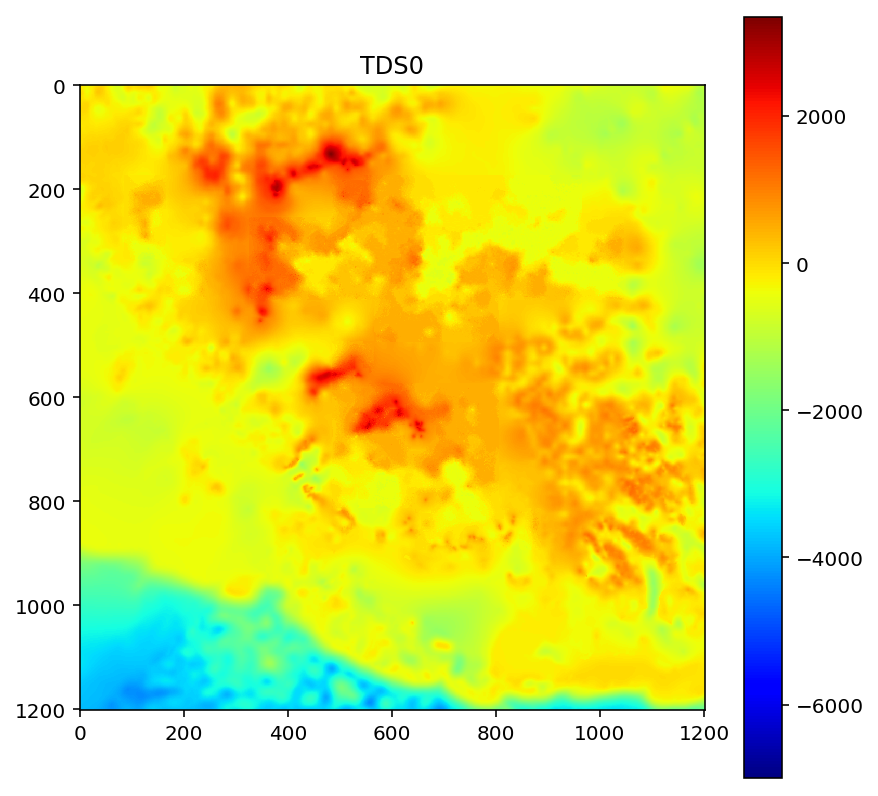

In [7]:
Output = np.loadtxt('AntarcticaRealization\z_Antarctica_PatternTDS0.txt',skiprows=0)
Output = Output.reshape(Realization_Height,Realization_Width)
Output = np.transpose(Output)
plt.figure(figsize=(7,7))
plt.imshow(Output,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
# plt.imshow(Output,cmap = 'jet', vmin=-1500, vmax=1500)
plt.title('TDS0')
plt.colorbar()
plt.show()

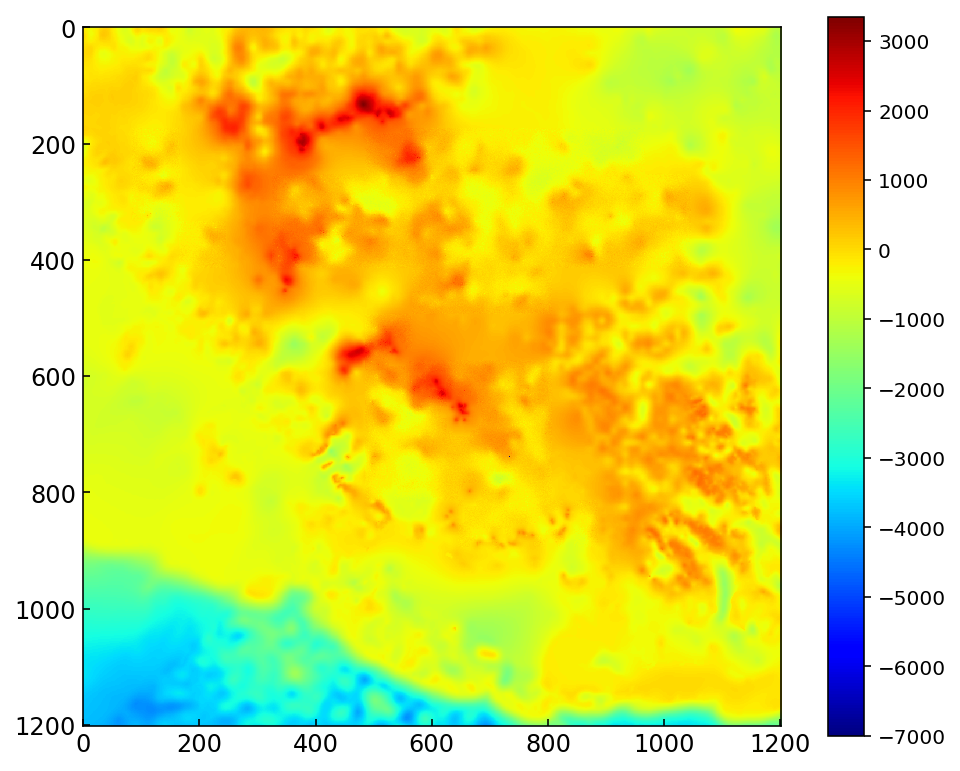

In [8]:
Output = np.loadtxt('AntarcticaRealization\z_Antarctica_DS0.txt',skiprows=0)
Output = Output.reshape(Realization_Height,Realization_Width)
Output = np.transpose(Output)
plt.figure(figsize=(7,7))
plt.imshow(Output,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
# plt.title('DS')
plt.tick_params(direction='in',labelsize='large')
plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
plt.show()

TDS output 0


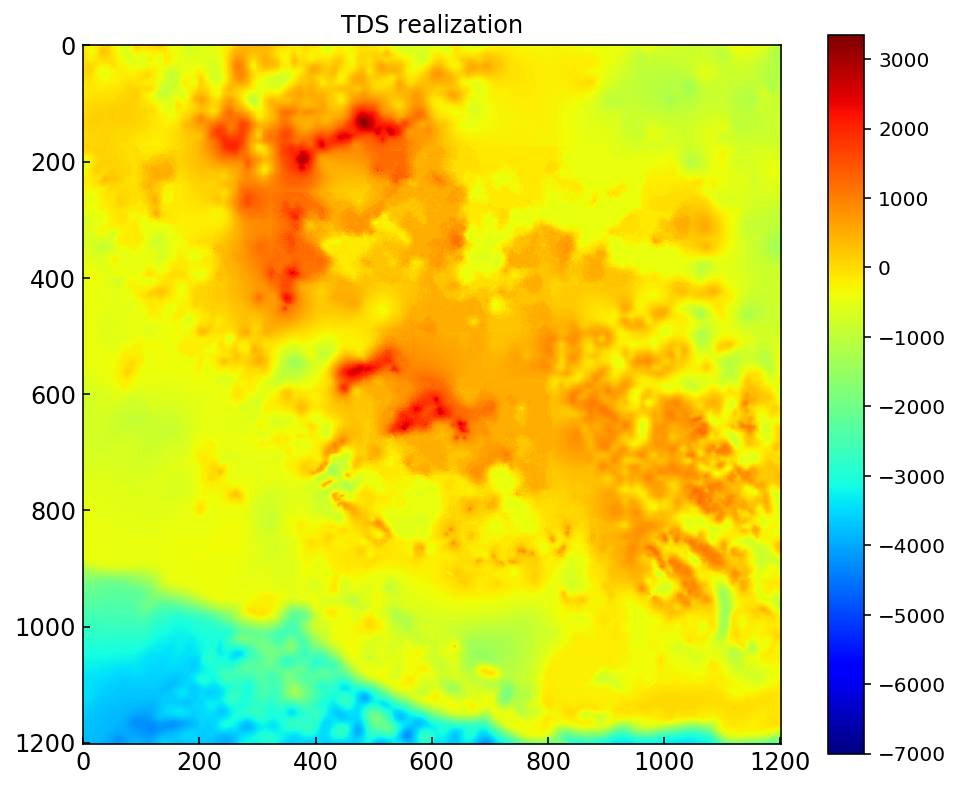

TDS output 1


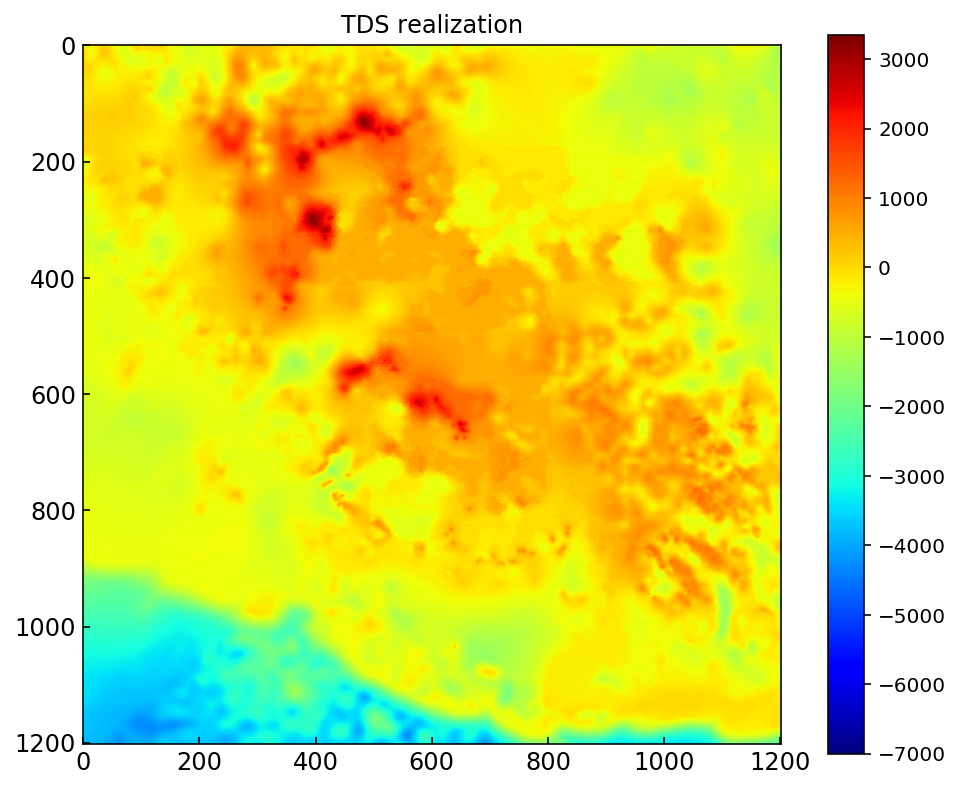

TDS output 2


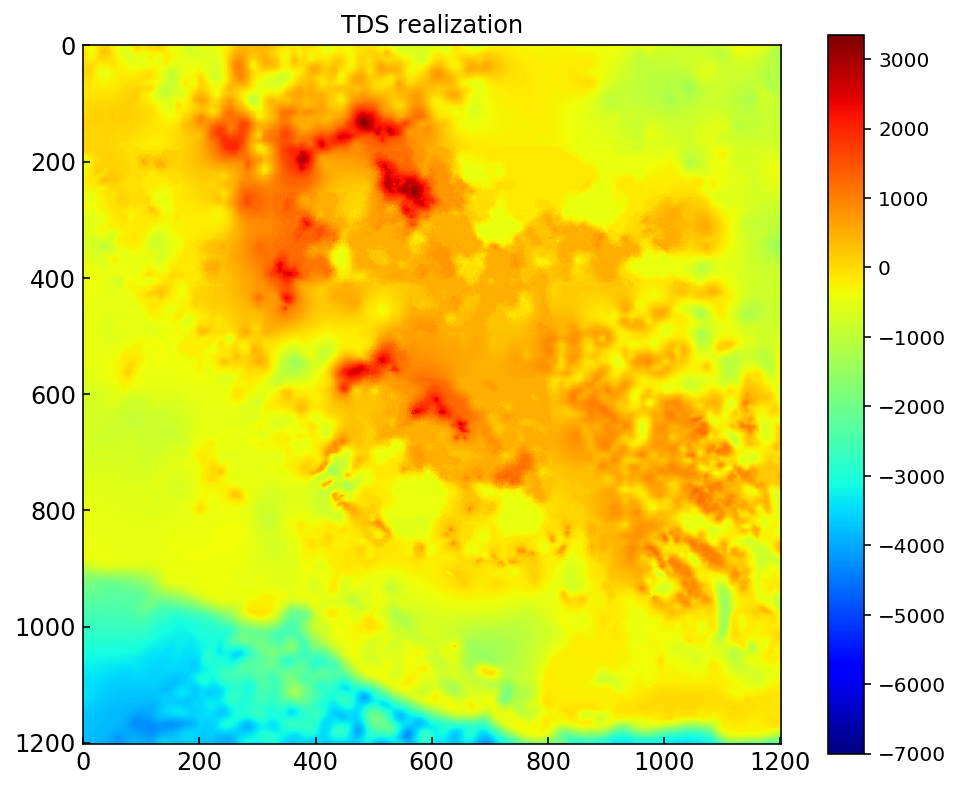

In [9]:
# outputAmount = 10
TDS = np.zeros((outputAmount,Realization_Height,Realization_Width))

outputIndex = 0
for outputIndex in range(outputAmount):
    print("TDS output "+str(outputIndex));
    Output = np.loadtxt('AntarcticaRealization\z_Antarctica_PatternTDS'+str(outputIndex)+'.txt')
    Output = Output.reshape(Realization_Height,Realization_Width)
    Output = np.transpose(Output)
    TDS[outputIndex] = np.copy(Output)
    plt.figure(figsize=(7,7))
    plt.imshow(Output,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
    plt.title('TDS realization')
    plt.tick_params(direction='in',labelsize='large')
    plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
    plt.show()

output 0


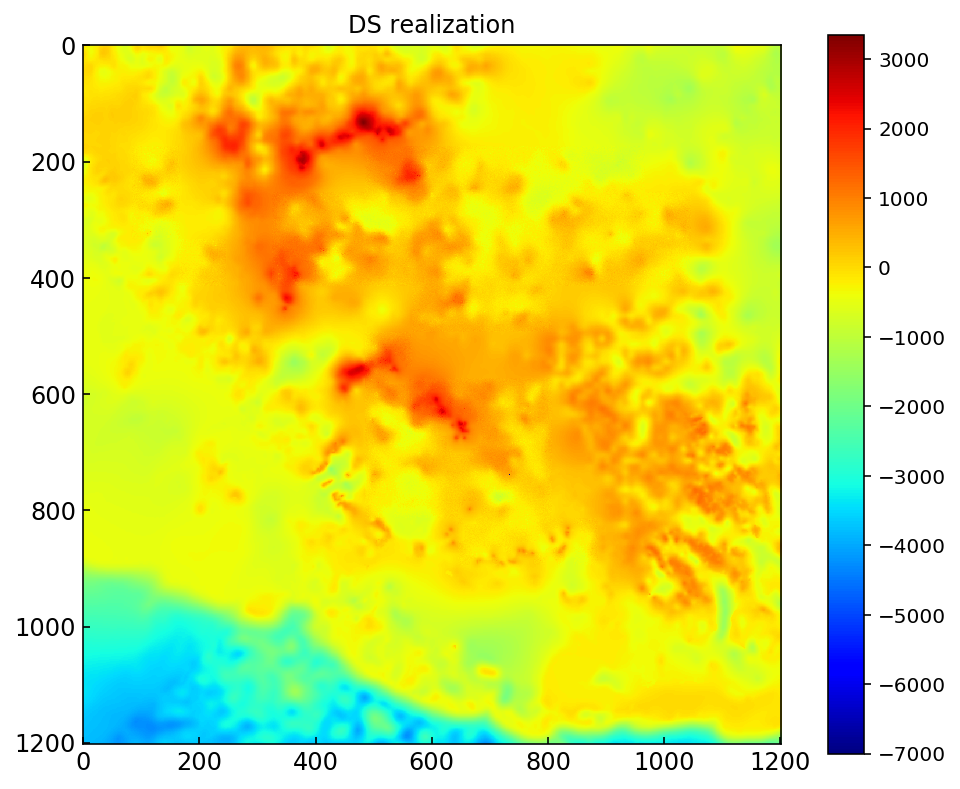

output 1


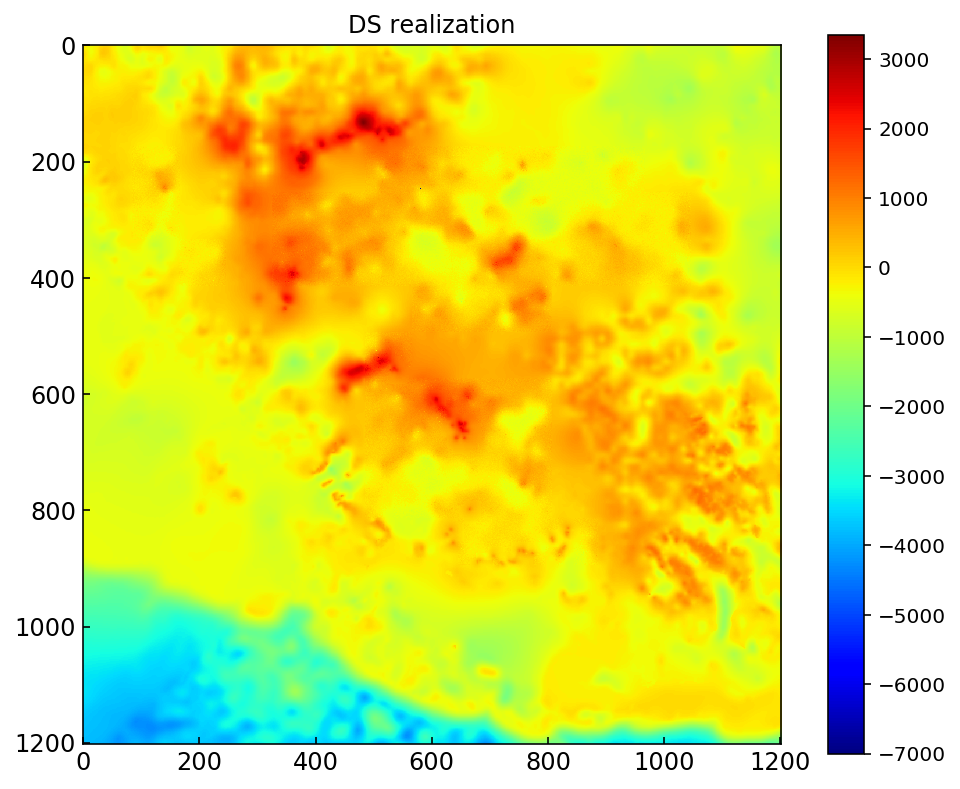

output 2


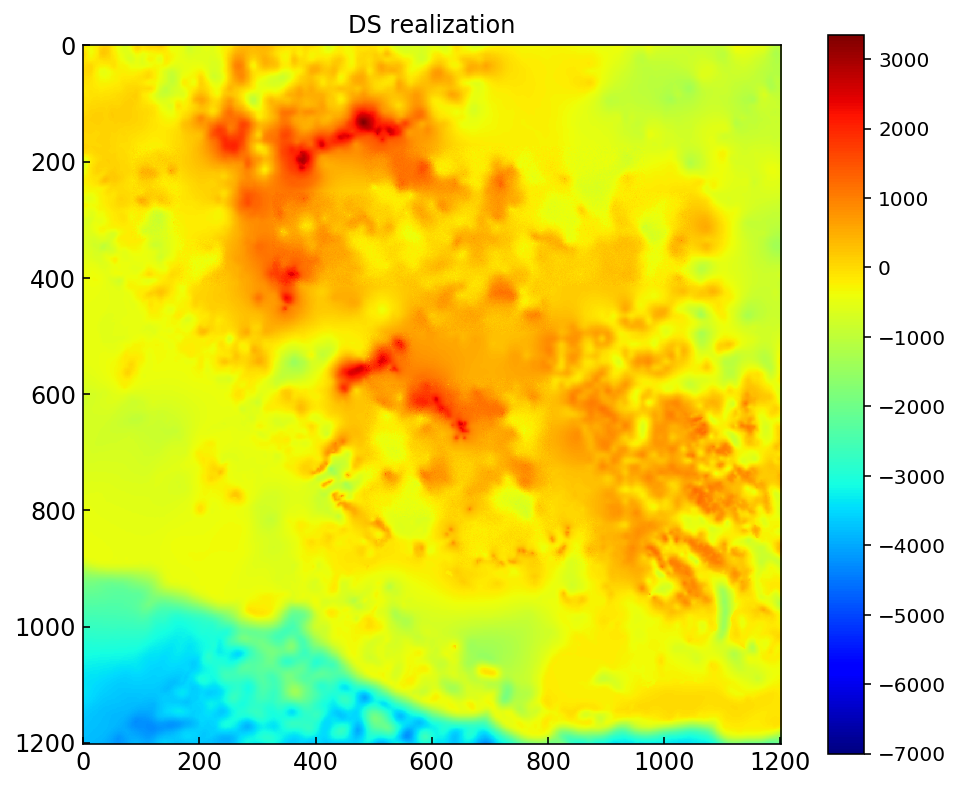

In [10]:
# outputAmount = 10
DS = np.zeros((outputAmount,Realization_Height,Realization_Width))

outputIndex = 0
for outputIndex in range(outputAmount):
    print("output "+str(outputIndex));
    Output = np.loadtxt('AntarcticaRealization\z_Antarctica_DS'+str(outputIndex)+'.txt')
    Output = Output.reshape(Realization_Height,Realization_Width)
    Output = np.transpose(Output)
    DS[outputIndex] = np.copy(Output)
    plt.figure(figsize=(7,7))
    plt.imshow(Output,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
    plt.title('DS realization')
    plt.tick_params(direction='in',labelsize='large')
    plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
    plt.show()

the size of mean is (1202, 1202)
the size of variance is (1202, 1202)
mean of TDS models


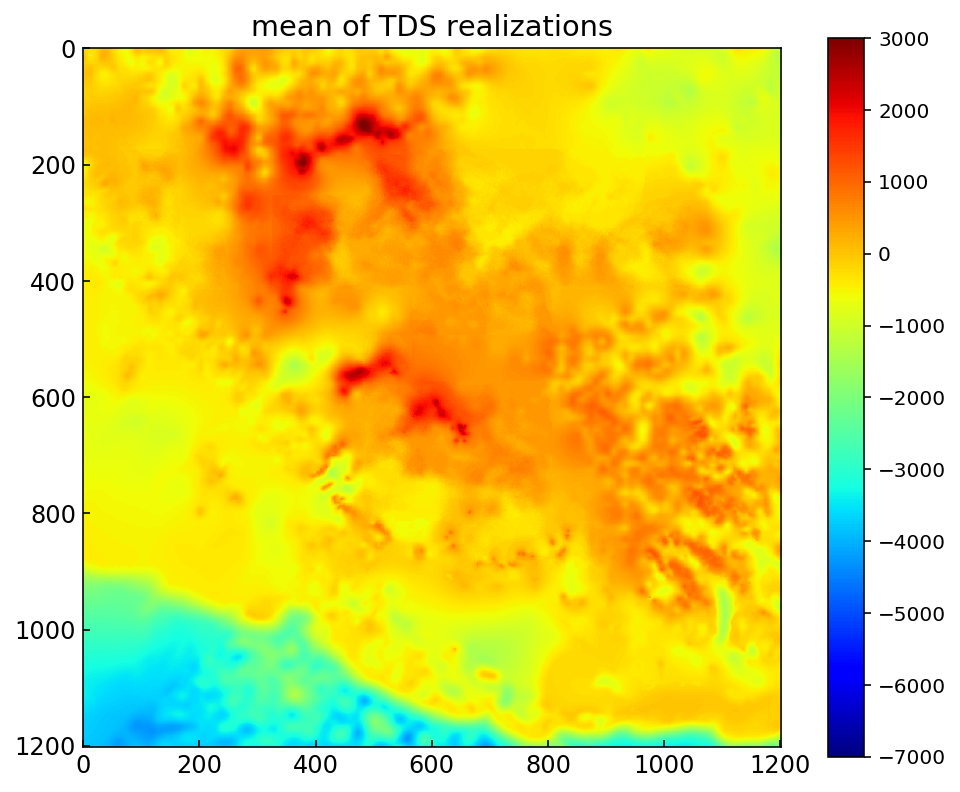

mean of DS models


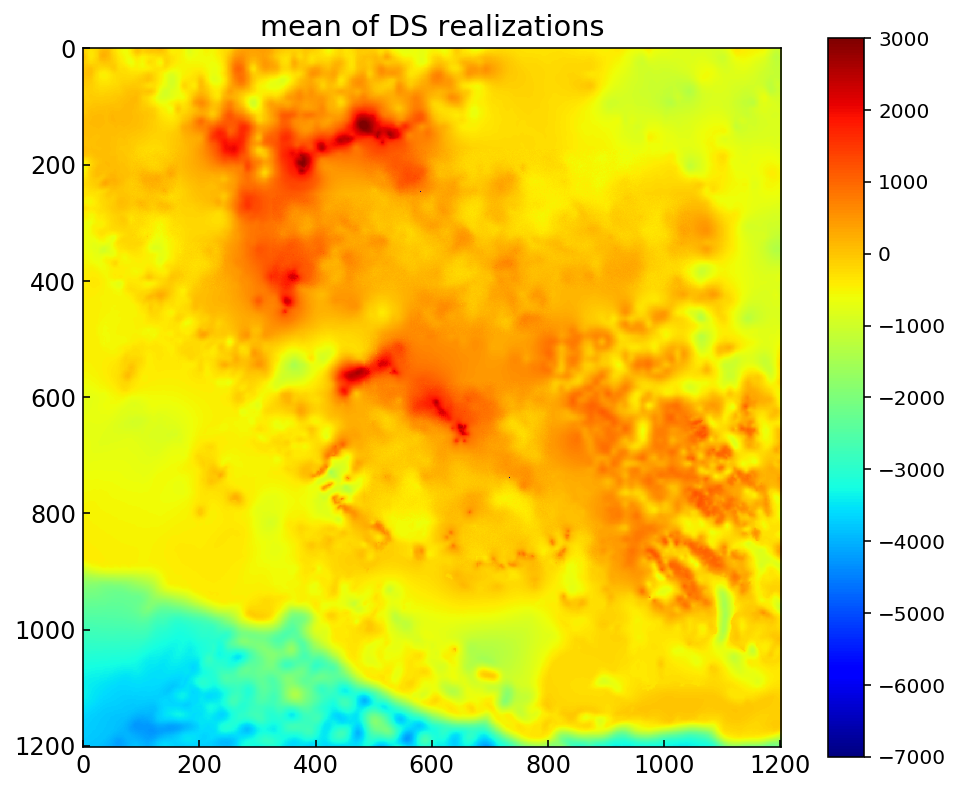

variance of TDS models


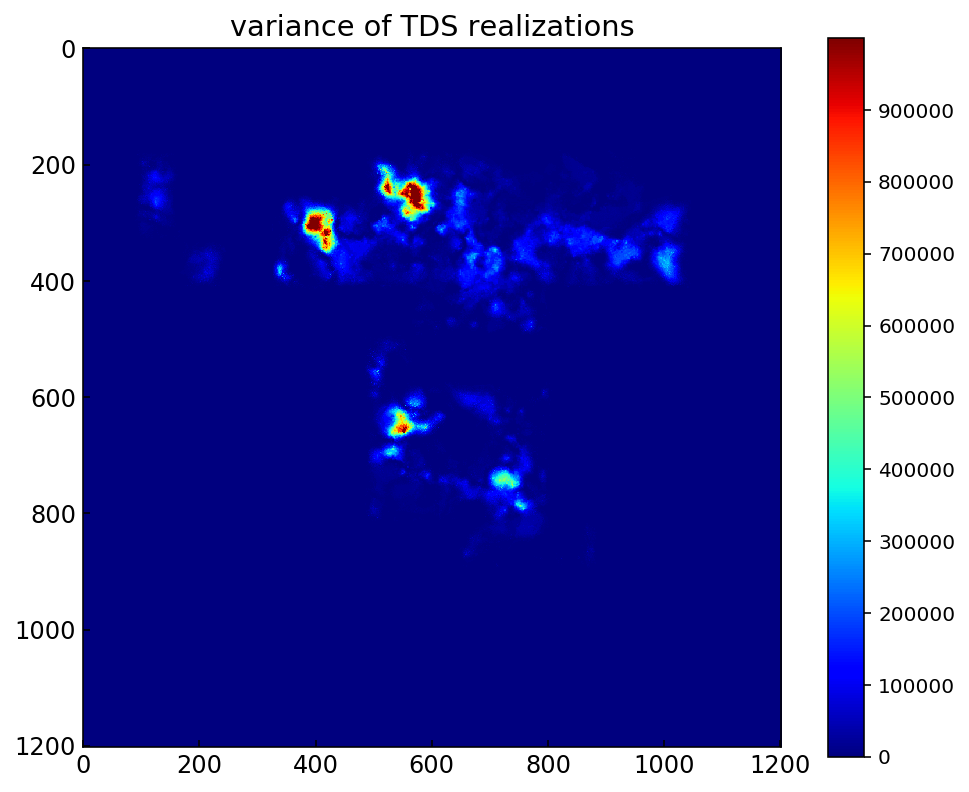

variance of DS models


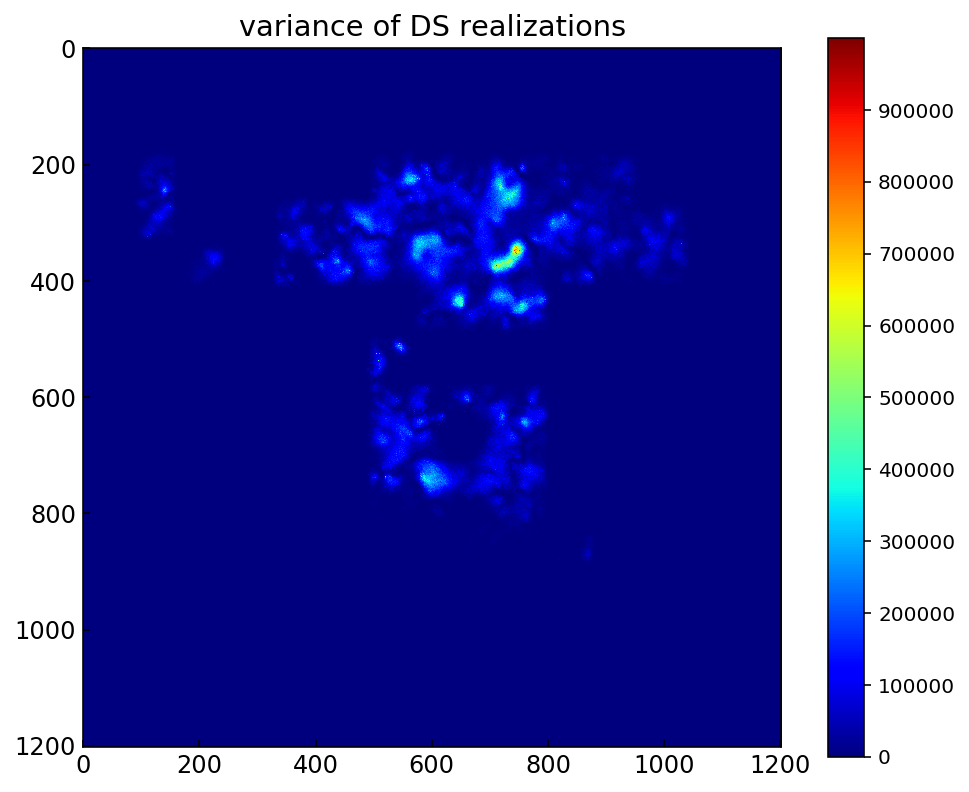

In [11]:
mean_TDS = np.mean(TDS,axis=0)
print('the size of mean is '+str(mean_TDS.shape))

variance_TDS = np.var(TDS,axis=0)
print('the size of variance is '+str(variance_TDS.shape))

mean_DS = np.mean(DS,axis=0)
variance_DS = np.var(DS,axis=0)

print('mean of TDS models')
plt.figure(figsize=(7,7))
plt.imshow(mean_TDS,cmap = 'jet',vmin=-7000,vmax=3000)
plt.title('mean of TDS realizations',fontsize='x-large')
plt.tick_params(direction='in',labelsize='large')
plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
plt.show()

print('mean of DS models')
plt.figure(figsize=(7,7))
plt.imshow(mean_DS,cmap = 'jet',vmin=-7000,vmax=3000)
plt.title('mean of DS realizations',fontsize='x-large')
plt.tick_params(direction='in',labelsize='large')
plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
plt.show()

print('variance of TDS models')
plt.figure(figsize=(7,7))
plt.imshow(variance_TDS,cmap = 'jet',vmin=0,vmax=1000000)
plt.title('variance of TDS realizations',fontsize='x-large')
plt.tick_params(direction='in',labelsize='large')
plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(0,1000000,step=100000))
plt.show()

print('variance of DS models')
plt.figure(figsize=(7,7))
plt.imshow(variance_DS,cmap = 'jet',vmin=0,vmax=1000000)
plt.title('variance of DS realizations',fontsize='x-large')
plt.tick_params(direction='in',labelsize='large')
plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(0,1000000,step=100000))
plt.show()

In [12]:
Boundary_2D = np.zeros((Realization_Height, Realization_Width))
Boundary_2D[ Realization_2D < -7000 ] = 1.0
SimulationArea_2D = np.zeros((Realization_Height, Realization_Width))
for y in range(1,Realization_Height-1):
    for x in range(1,Realization_Width-1):
        if(Boundary_2D[y][x] == 1):
            for i in range(-1,2):
                for j in range(-1,2):
                    if(Boundary_2D[y+i][x+j] == 0):
                        SimulationArea_2D[y][x] = 1
                        
# Boundary_2D = Boundary_2D.T
# SimulationArea_2D = SimulationArea_2D.T

Boundary_2D = np.copy(SimulationArea_2D)
Boundary_2D = Boundary_2D*-1 + 1

Boundary_y = []
Boundary_x = []
for y in range(1,Realization_Height-1):
    for x in range(1,Realization_Width-1):
        if(Boundary_2D[y][x] == 0):
            Boundary_y.append(y)
            Boundary_x.append(x)

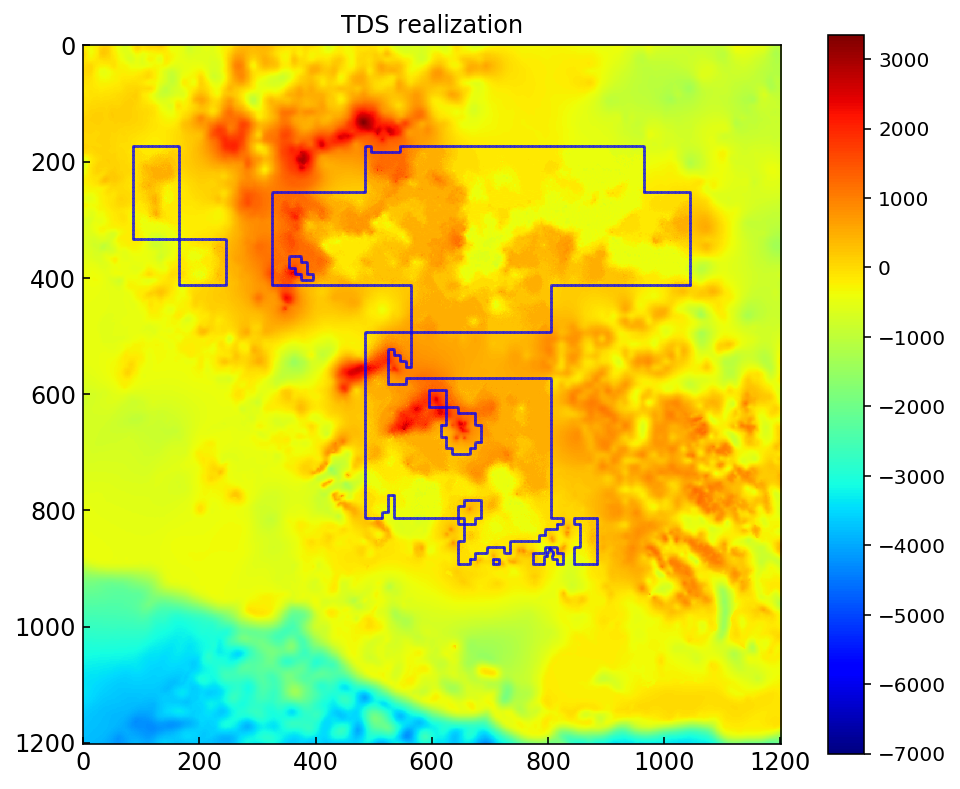

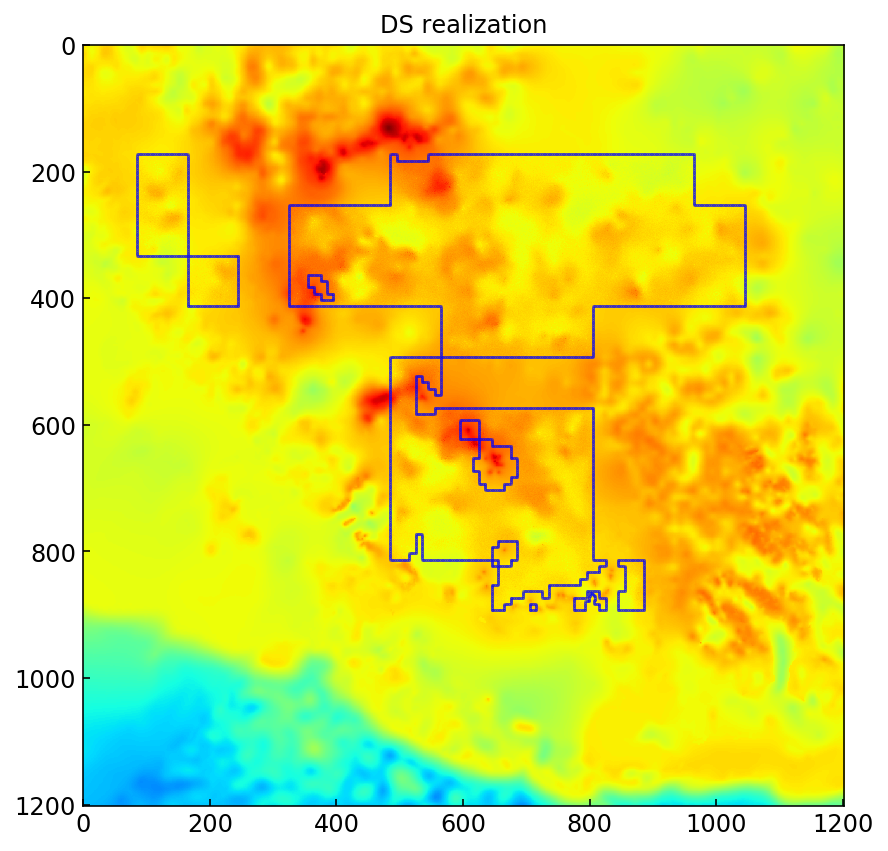

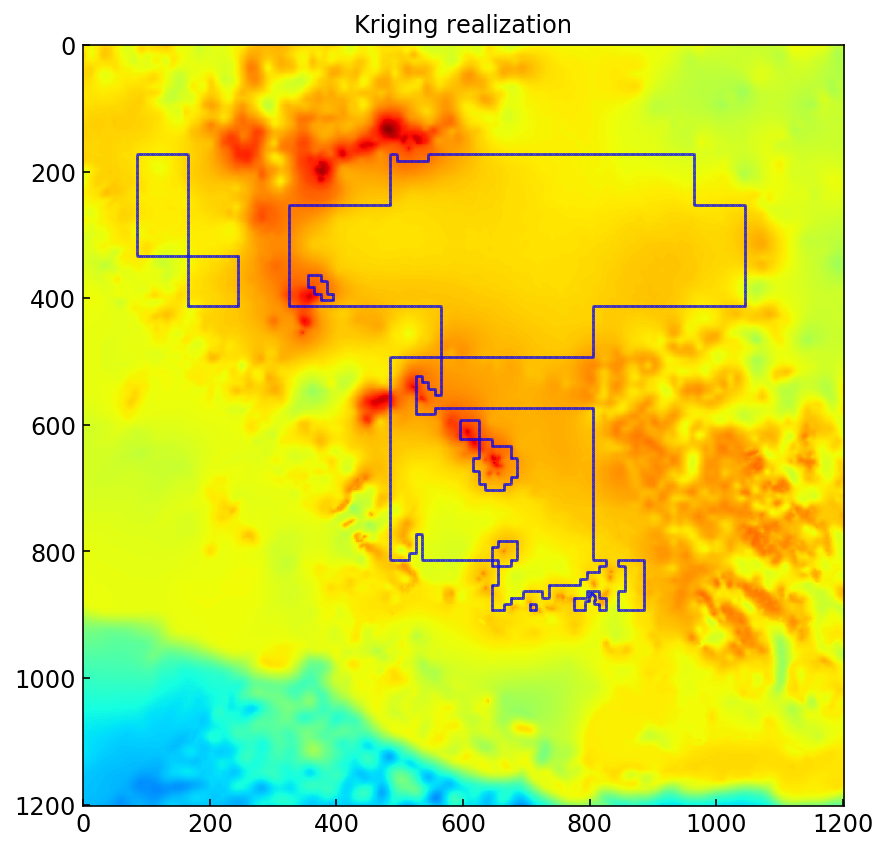

In [13]:
plt.figure(figsize=(7,7))
plt.imshow(TDS[0],cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
plt.plot(Boundary_x, Boundary_y, 'b.',linewidth=0.1,markersize=0.3)
plt.title('TDS realization')
plt.tick_params(direction='in',labelsize='large')
plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
plt.show()

plt.figure(figsize=(7,7))
plt.imshow(DS[0],cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
plt.plot(Boundary_x, Boundary_y, 'b.',linewidth=0.1,markersize=0.3)
plt.title('DS realization')
plt.tick_params(direction='in',labelsize='large')
# plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
plt.show()

Output = np.loadtxt('AntarcticaRealization\z_Antarctica_kriging.txt')
Output = Output.reshape(Realization_Height,Realization_Width)
plt.figure(figsize=(7,7))
plt.imshow(Output,cmap = 'jet', vmin=knownBelowbound, vmax=knownUpbound)
plt.plot(Boundary_x, Boundary_y, 'b.',linewidth=0.1,markersize=0.3)
plt.title('Kriging realization')
plt.tick_params(direction='in',labelsize='large')
# plt.colorbar(fraction=0.046,pad=0.06,ticks=np.arange(-7000,3001,step=1000))
plt.show()